In [1]:
from keras.applications.vgg16 import VGG16
import numpy as np
from keras.models import Sequential,Model,load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,Input
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import optimizers
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [7]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

in_jpg=("C:\\Users\\beggr\\Downloads\\testing\\")
out_jpg=("C:\\Users\\beggr\\Downloads\\goal\\")
imag=input("")
image= cv2.imread(in_jpg+imag)
 
# グレースケールに変換
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# 顔認識用特徴量ファイルを読み込む --- （カスケードファイルのパスを指定）
cascade = cv2.CascadeClassifier(r"C:\Users\beggr\Anaconda3\pkgs\libopencv-3.4.1-h875b8b8_3\Library\etc\haarcascades\haarcascade_frontalface_alt.xml")
# 顔認識の実行
face_list = cascade.detectMultiScale(image_gs,scaleFactor=1.1,minNeighbors=1,minSize=(200,200))
 
#顔が１つ以上検出された時
if len(face_list) > 0:
    for rect in face_list:
        image_gs = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
else:
    print("no face")
cv2.imwrite(out_jpg+imag, image_gs)

1.jpg


True

watanabemiho (99 %)


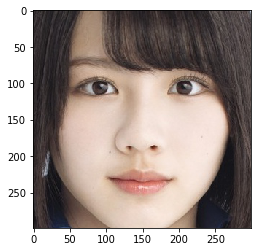

In [8]:
categories=["hamagisihiyori","higasimuramei","igutimao","kageyamayuuka","kakizakimemi","kanemuramiku",
            "katousiho","kawatahina","kosakanao","matudakonoka","nibuakari","saitoukyouko",
            "sasakikumi","sasakimirei","takamotoayaka","takasemana","tomitasuzuka","usiosarina","watanabemiho"]
def build_model():
    
    model=load_model("C:\\Users\\beggr\\Downloads\\hinata2_model.h5")
    
    return model

    
def main(fname):
    image=Image.open(fname)
    image=image.convert("RGB")
    image=image.resize((128,128))
    data=np.asarray(image)/255.0
    X=[]
    X.append(data)
    X=np.array(X)
    model=build_model()
    result=model.predict([X])[0]
    predicted=result.argmax()
    percentage=int(result[predicted] * 100)
    print("{0} ({1} %)".format(categories[predicted], percentage))
im=out_jpg+imag

main(im)
image=Image.open(im)
im_list = np.asarray(image)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()